In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
!git clone https://github.com/chengyuanmao819/CSE151A-GroupProject.git

Cloning into 'CSE151A-GroupProject'...
remote: Enumerating objects: 299, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 299 (delta 59), reused 61 (delta 31), pack-reused 187
Receiving objects: 100% (299/299), 331.39 MiB | 26.11 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Updating files: 100% (27/27), done.


In [3]:
%cd CSE151A-GroupProject

/content/CSE151A-GroupProject


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Inspect Data

We gathered data from various cities across California and developed a Neural Network model to predict prices.

In [5]:
sd = pd.read_csv('/content/CSE151A-GroupProject/sandiego.csv')
la = pd.read_csv('/content/CSE151A-GroupProject/losangeles.csv')

print(sd.shape)
print(la.shape)

(12346, 75)
(44684, 75)


In [6]:
data = pd.concat([sd, la])
data.describe().round(3)

id     scrape_id       host_id  host_listings_count  \
count  5.703000e+04  5.703000e+04  5.703000e+04            57028.000   
mean   4.776545e+17  2.024061e+13  1.847015e+08               93.699   
std    4.729897e+17  7.060222e+06  1.831224e+08              557.257   
min    6.000000e+00  2.024061e+13  2.900000e+01                0.000   
25%    3.272269e+07  2.024061e+13  2.555165e+07                1.000   
50%    5.936457e+17  2.024061e+13  1.074344e+08                3.000   
75%    9.444046e+17  2.024061e+13  3.451045e+08               13.000   
max    1.185207e+18  2.024062e+13  5.844793e+08             4723.000   

       host_total_listings_count   latitude  longitude  accommodates  \
count                  57028.000  57030.000  57030.000     57030.000   
mean                     126.614     33.777   -118.068         4.268   
std                      678.042      0.545      0.490         3.012   
min                        0.000     32.541   -118.917         1.000   
25%                        2.000     33.787   -118.387         2.000   
50%                        5.000     34.037   -118.289         4.000   
75%                       21.000     34.095   -117.941         6.000   
max                     8970.000     34.811   -116.937        16.000   

       bathrooms   bedrooms  ...  review_scores_cleanliness  \
count  48192.000  54126.000  ...                  42892.000   
mean       1.655      1.824  ...                      4.768   
std        1.178      1.351  ...                      0.391   
min        0.000      0.000  ...                      0.000   
25%        1.000      1.000  ...                      4.710   
50%        1.000      1.000  ...                      4.890   
75%        2.000      2.000  ...                      5.000   
max       50.000     50.000  ...                      5.000   

       review_scores_checkin  review_scores_communication  \
count              42883.000                    42890.000   
mean                   4.871                        4.871   
std                    0.317                        0.331   
min                    0.000                        0.000   
25%                    4.870                        4.880   
50%                    4.970                        4.970   
75%                    5.000                        5.000   
max                    5.000                        5.000   

       review_scores_location  review_scores_value  \
count               42882.000            42881.000   
mean                    4.815                4.716   
std                     0.332                0.410   
min                     0.000                0.000   
25%                     4.770                4.650   
50%                     4.910                4.810   
75%                     5.000                4.940   
max                     5.000                5.000   

       calculated_host_listings_count  \
count                       57030.000   
mean                           18.845   
std                            70.695   
min                             1.000   
25%                             1.000   
50%                             2.000   
75%                            10.000   
max                           644.000   

       calculated_host_listings_count_entire_homes  \
count                                    57030.000   
mean                                        16.907   
std                                         70.483   
min                                          0.000   
25%                                          1.000   
50%                                          1.000   
75%                                          7.000   
max                                        644.000   

       calculated_host_listings_count_private_rooms  \
count                                     57030.000   
mean                                          1.620   
std                                           6.238   
min                                  

In [7]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
data2 = data[['longitude', 'latitude', 'room_type', 'price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews', 'calculated_host_listings_count', 'availability_30', 'availability_60']] # 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','host_response_rate', 'host_acceptance_rate' , 'availability_90', 'availability_365'

In [9]:
data2.isnull().sum()

longitude                             0
latitude                              0
room_type                             0
price                              8836
accommodates                          0
bathrooms                          8838
bedrooms                           2904
beds                               8997
minimum_nights                        0
review_scores_rating              14071
number_of_reviews                     0
calculated_host_listings_count        0
availability_30                       0
availability_60                       0
dtype: int64

In [10]:
data2 = data2.dropna() #subset=['price', 'bathrooms', 'bedrooms', 'beds'])

In [11]:
print('total nan value: ', data2.isnull().sum())

total nan value:  longitude                         0
latitude                          0
room_type                         0
price                             0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
minimum_nights                    0
review_scores_rating              0
number_of_reviews                 0
calculated_host_listings_count    0
availability_30                   0
availability_60                   0
dtype: int64


Remove unnecessary columns from the data

## Convert room_type into integer values

In [12]:
print(data2['room_type'].unique())
room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3} # might be changed later
data2['room_type'] = data2['room_type'] .replace(room_type_dict)
print(data2['room_type'].unique())


['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
[0 1 2 3]


In [13]:
data2['price'] = data2['price'].str.replace('$', '').str.replace(',', '').astype(float)
# data2['host_acceptance_rate'] = data2['host_acceptance_rate'].str.replace('%', '').astype(float)
# data2['host_response_rate'] = data2['host_response_rate'].str.replace('%', '').astype(float)

In [14]:
data2.describe().round(3)

longitude   latitude  room_type      price  accommodates  bathrooms  \
count  37116.000  37116.000  37116.000  37116.000     37116.000  37116.000   
mean    -118.007     33.711      0.204    281.162         4.428      1.596   
std        0.519      0.582      0.428    882.769         3.009      1.032   
min     -118.917     32.541      0.000      6.000         1.000      0.000   
25%     -118.380     32.864      0.000    105.000         2.000      1.000   
50%     -118.253     34.015      0.000    170.000         4.000      1.000   
75%     -117.258     34.093      0.000    294.000         6.000      2.000   
max     -116.937     34.792      3.000  99999.000        16.000     14.000   

        bedrooms       beds  minimum_nights  review_scores_rating  \
count  37116.000  37116.000       37116.000             37116.000   
mean       1.786      2.206          12.616                 4.802   
std        1.301      1.953          20.078                 0.361   
min        0.000      0.000           1.000                 1.000   
25%        1.000      1.000           2.000                 4.750   
50%        1.000      2.000           3.000                 4.900   
75%        2.000      3.000          30.000                 5.000   
max       23.000     34.000        1000.000                 5.000   

       number_of_reviews  calculated_host_listings_count  availability_30  \
count          37116.000                       37116.000        37116.000   
mean              60.107                          14.795           12.111   
std               99.479                          51.611           10.411   
min                1.000                           1.000            0.000   
25%                5.000                           1.000            3.000   
50%               21.000                           3.000            9.000   
75%               71.000                           9.000           21.000   
max             2903.000                         644.000           30.000   

       availability_60  
count        37116.000  
mean            29.370  
std             19.988  
min              0.000  
25%             12.000  
50%             29.000  
75%             47.000  
max             60.000

## Remove the outliners and abnormalities

In [15]:
# https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns, th1=0.01, th3=0.90, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(th1)
        Q3 = df[column].quantile(th3)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        print(f"column: {column}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
# consider: Removing Outliers using Standard Deviation (probably not good because data is not normally distributed)
# data2 columns: 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm'
test_df = remove_outliers_iqr(data2, ['price'],th3=0.6, multiplier=1.5)
test_df.describe()

column: price, lower_bound: -210.5, upper_bound: 449.5


longitude      latitude     room_type         price  accommodates  \
count  32356.000000  32356.000000  32356.000000  32356.000000  32356.000000   
mean    -118.016938     33.735209      0.230313    172.899895      3.821980   
std        0.505530      0.571116      0.445715     97.300358      2.409394   
min     -118.907660     32.540760      0.000000      6.000000      1.000000   
25%     -118.373650     33.345145      0.000000     99.000000      2.000000   
50%     -118.250761     34.019681      0.000000    150.000000      3.000000   
75%     -117.737035     34.093682      0.000000    229.000000      5.000000   
max     -116.936852     34.791820      3.000000    449.000000     16.000000   

          bathrooms      bedrooms          beds  minimum_nights  \
count  32356.000000  32356.000000  32356.000000    32356.000000   
mean       1.380470      1.516937      1.865929       13.183459   
std        0.742728      1.026759      1.516452       20.401580   
min        0.000000      0.000000      0.000000        1.000000   
25%        1.000000      1.000000      1.000000        2.000000   
50%        1.000000      1.000000      1.000000        3.000000   
75%        2.000000      2.000000      3.000000       30.000000   
max       14.000000     23.000000     20.000000     1000.000000   

       review_scores_rating  number_of_reviews  \
count          32356.000000       32356.000000   
mean               4.795011          63.430214   
std                0.368555         103.908517   
min                1.000000           1.000000   
25%                4.750000           5.000000   
50%                4.900000          22.000000   
75%                5.000000          76.000000   
max                5.000000        2903.000000   

       calculated_host_listings_count  availability_30  availability_60  
count                    32356.000000     32356.000000     32356.000000  
mean                        14.070466        11.902522        29.153635  
std                         53.690687        10.385927        20.052858  
min                          1.000000         0.000000         0.000000  
25%                          1.000000         2.000000        11.000000  
50%                          3.000000         9.000000        28.000000  
75%                          9.000000        21.000000        47.000000  
max                        644.000000        30.000000        60.000000

Categorize the value of price in a group:

In [16]:
print(f"Highest price per night: {test_df['price'].max()}")
print(f"Lowest price per night: {test_df['price'].min()}")

Highest price per night: 449.0
Lowest price per night: 6.0


Categorize the value in range below

|Range|
|--------|
|  0 - 111|
|112 - 223|
|224 - 335|
|336 - 449|  

In [17]:
# data['price'] = pd.to_numeric(data['price'], errors='coerce')

bins = [0, 112, 224, 336, 450]
labels = ['0 - 111', '112 - 223', '224 - 335', '336 - 449']

# Categorize the price feature r
test_df['price_category'] = pd.cut(test_df['price'], bins=bins, labels = labels,include_lowest=True)

# Display the DataFrame with the new categorized column
print(test_df[['price', 'price_category']])

       price price_category
0      199.0      112 - 223
1       96.0        0 - 111
2      227.0      224 - 335
3      191.0      112 - 223
4      115.0      112 - 223
...      ...            ...
44355  129.0      112 - 223
44358  117.0      112 - 223
44369  362.0      336 - 449
44380   72.0        0 - 111
44502   79.0        0 - 111

[32356 rows x 2 columns]


<ipython-input-17-ca8134052886>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['price_category'] = pd.cut(test_df['price'], bins=bins, labels = labels,include_lowest=True)


## Normalization: Minmax implementation

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_to_scale = test_df.drop(['price','price_category'], axis=1)
data2_norm = pd.DataFrame(scaler.fit_transform(data_to_scale), columns=data_to_scale.columns)
data2_norm['price'] = test_df['price'].values
data2_norm['price_category'] = test_df['price_category'].values
data2_norm.head()

longitude  latitude  room_type  accommodates  bathrooms  bedrooms  beds  \
0   0.902640  0.095271   0.000000      0.333333   0.142857  0.130435  0.15   
1   0.849225  0.117531   0.333333      0.066667   0.071429  0.043478  0.00   
2   0.837251  0.118500   0.000000      0.333333   0.142857  0.086957  0.15   
3   0.831689  0.120943   0.000000      0.066667   0.071429  0.086957  0.15   
4   0.849367  0.117922   0.000000      0.066667   0.071429  0.000000  0.00   

   minimum_nights  review_scores_rating  number_of_reviews  \
0        0.000000                0.9525           0.052378   
1        0.005005                1.0000           0.000345   
2        0.003003                0.9425           0.036527   
3        0.003003                0.9825           0.113370   
4        0.000000                0.9650           0.372502   

   calculated_host_listings_count  availability_30  availability_60  price  \
0                        0.000000         0.033333         0.233333  199.0   
1                        0.001555         0.166667         0.283333   96.0   
2                        0.006221         0.100000         0.366667  227.0   
3                        0.000000         0.033333         0.116667  191.0   
4                        0.001555         0.200000         0.333333  115.0   

  price_category  
0      112 - 223  
1        0 - 111  
2      224 - 335  
3      112 - 223  
4      112 - 223

In [19]:
data2_norm.columns

Index(['longitude', 'latitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_30', 'availability_60', 'price', 'price_category'],
      dtype='object')

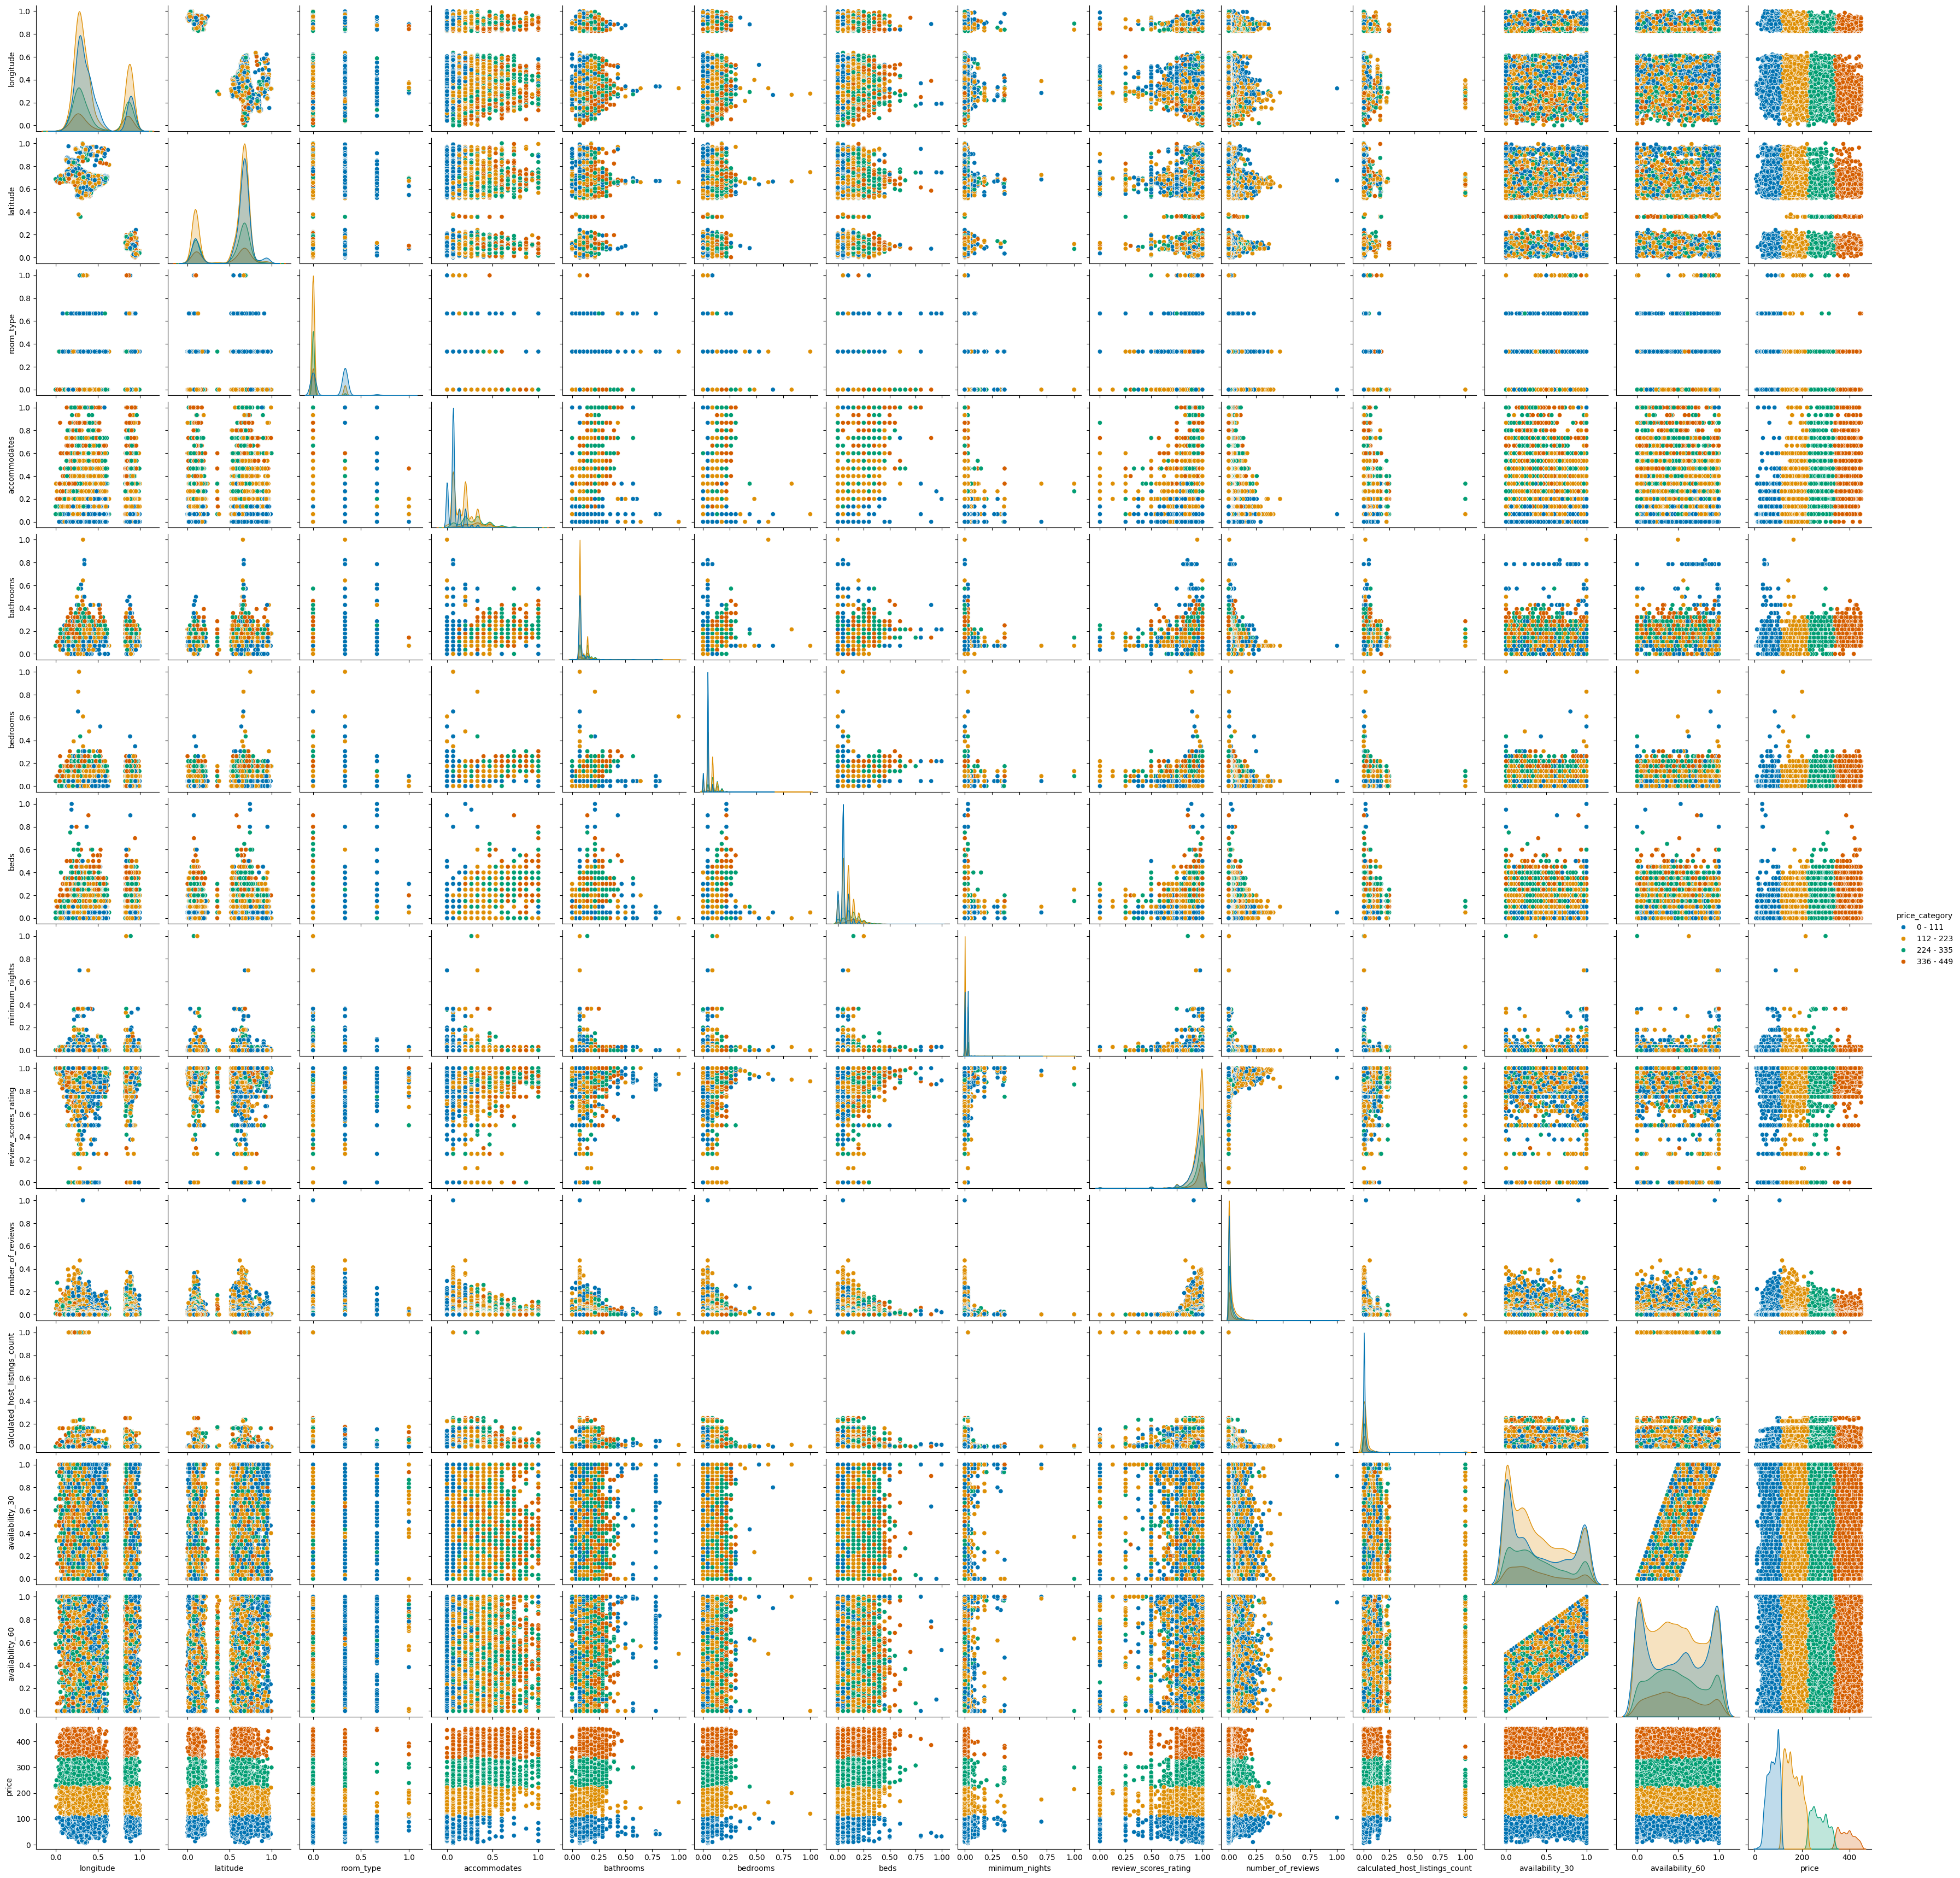

In [ ]:
sns.pairplot(data2_norm, hue= 'price_category', palette = 'colorblind')

Based on this pairplot graph, we observe that each price category, represented by different colors, is spread throughout the graph. This dispersion makes it challenging for our SVM model to classify them visually. The SVM model can only make predictions within the defined price range.

**Performing SVM Linear Classifier:**

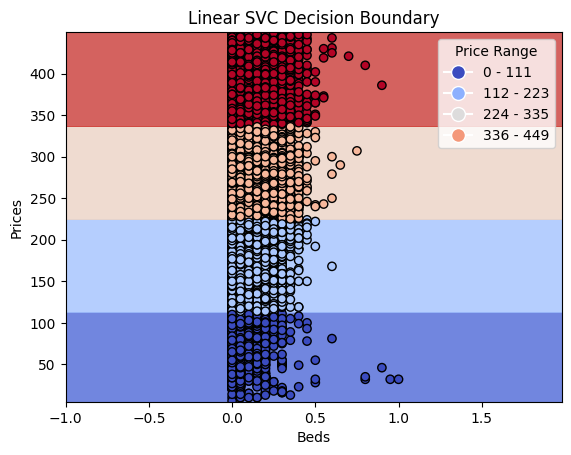

In [37]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Define features and target
X = data2_norm[['beds', 'price']].values
y = data2_norm['price_category'].cat.codes.values  # Convert categories to numeric codes
categories = data2_norm['price_category'].cat.categories

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Create a mesh grid for visualization
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict classifications for each point in the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Create a custom legend
colors = [plt.cm.coolwarm(i / len(categories)) for i in range(len(categories))]
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category)
           for category, color in zip(categories, colors)]
plt.legend(handles=patches, title='Price Range')

plt.xlabel('Beds')
plt.ylabel('Prices')
plt.title('Linear SVC Decision Boundary')
plt.show()


**Discussion:** This SVM classifier might not be very helpful for our purposes because the pairplot already allows us to easily visualize the price categories. Additionally, we created a new feature called price_category by thresholding the prices into different ranges. To address this, we decided to construct a new model using the SVM classifier to predict the price category. This approach aims to improve classification accuracy by leveraging the SVM model's ability to handle the thresholded price categories more effectively.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Assuming data2_norm is your DataFrame after scaling and including 'price'
X = data2_norm.drop(['price', 'price_category'], axis=1)
y = data2_norm['price_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVC model
svc_model = SVC(kernel='linear', C=100, gamma=0.1)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.6246909765142151
Classification Report:
              precision    recall  f1-score   support

     0 - 111       0.78      0.67      0.72      2087
   112 - 223       0.60      0.79      0.68      2732
   224 - 335       0.44      0.44      0.44      1114
   336 - 449       0.00      0.00      0.00       539

    accuracy                           0.62      6472
   macro avg       0.46      0.47      0.46      6472
weighted avg       0.58      0.62      0.60      6472

Confusion Matrix:
[[1408  673    6    0]
 [ 349 2150  233    0]
 [  29  600  485    0]
 [  12  157  370    0]]


Through this model, we have observed this model achived a moderate accuracy **62.47%**. Therefore, we decided to construct the new SVM regression model.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Assuming data2_norm is your DataFrame after scaling and including 'price'
X = data2_norm.drop(['price', 'price_category'], axis=1)  # Drop both price and price_category columns
y = data2_norm['price']  # Use 'price' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model
svr_model = SVR(kernel='linear', C=100, gamma=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 4373.607366785449
R^2 Score: 0.5374050412475859


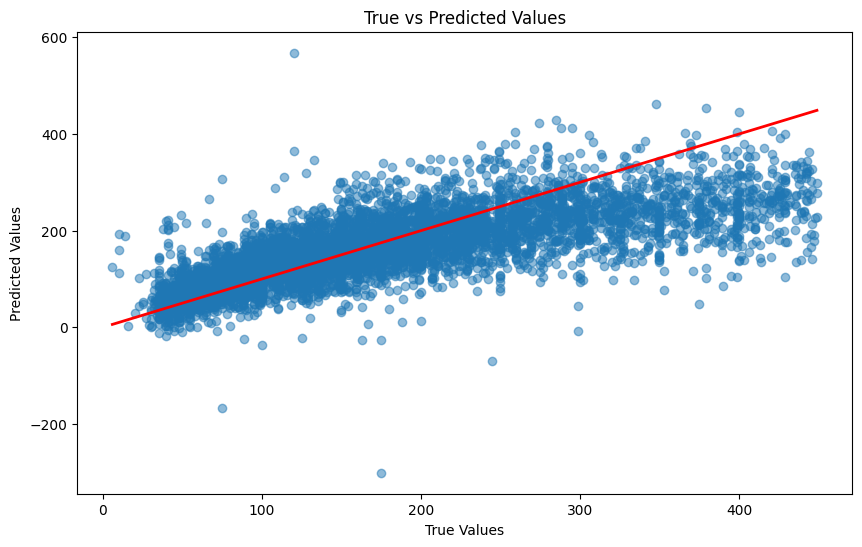

In [42]:
import matplotlib.pyplot as plt

y_pred = svr_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

Here's our final observation:
The model captures the general trend of the data well, as most points cluster around the red line, indicating predictions close to the true values. This positive correlation suggests that the model effectively learns the relationship between the features and the target variable, especially for mid-range true values (100 to 300). However, the model's performance has several issues. There is a noticeable spread of points around the red line, particularly for true values greater than 200, indicating significant variability in predictions. The model tends to underestimate higher true values (above 300), with many points falling below the red line. Additionally, there are outliers where predicted values differ significantly from the true values, including some negative predictions, suggesting potential limitations in the model or data issues. Predictions for lower true values (below 100) are also more scattered, indicating inconsistent performance in this range.